# Pymaceuticals Inc.
---

### Analysis
1. Capmulin and Ramicane were the most effective at reducing tumor volume.
2. There is a statistical corellation between tumor volume and weight for the Capomulin drug regimen.
3. Infubinol and Ceftamin were the lest effective at reducing tumor volume.

In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress, pearsonr
import numpy as np
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [2]:
# Combine the data into a single dataset
mouse_df=pd.merge(mouse_metadata,study_results, on="Mouse ID")


In [3]:
#Count the number of unique mouse ID
mouse_df['Mouse ID'].unique().size

249

In [4]:
# Display the data table for preview
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Checking the number of mice.
mouse_df['Mouse ID'].unique().size

249

In [6]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_df[mouse_df.duplicated()]

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [8]:
mouse_df.loc[mouse_df["Mouse ID"] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
#Rebuild the dataframe by removing the dulicate data for Mouse ID and 
#create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df=mouse_df.loc[mouse_df["Mouse ID"] != 'g989']

In [10]:
#shows the mouse has been deleted
mouse_df.loc[mouse_df["Mouse ID"] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [11]:
# Checking the number of mice in the clean DataFrame.
mouse_df['Mouse ID'].unique().size

248

In [12]:

mouse_df=mouse_df.reset_index()


In [13]:
mouse_df


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,0,k403,Ramicane,Male,21,16,0,45.000000,0
1,1,k403,Ramicane,Male,21,16,5,38.825898,0
2,2,k403,Ramicane,Male,21,16,10,35.014271,1
3,3,k403,Ramicane,Male,21,16,15,34.223992,1
4,4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...,...
1875,1888,z969,Naftisol,Male,9,30,25,63.145652,2
1876,1889,z969,Naftisol,Male,9,30,30,65.841013,3
1877,1890,z969,Naftisol,Male,9,30,35,69.176246,4
1878,1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [14]:
new_mouse_df=mouse_df.drop(columns='index',axis=1)

In [15]:
new_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#tumor_volume=[]
drug_reg_df=new_mouse_df.loc[:,['Drug Regimen','Tumor Volume (mm3)']]
tv_mean=drug_reg_df.groupby(['Drug Regimen']).mean()
tv_median=drug_reg_df.groupby(['Drug Regimen']).median()
tv_var=drug_reg_df.groupby(['Drug Regimen']).var()
tv_std=drug_reg_df.groupby(['Drug Regimen']).std()
tv_sem=drug_reg_df.groupby(['Drug Regimen']).sem()
sum_tv=pd.merge(tv_mean,tv_median,on='Drug Regimen')#,tv_sem,on='Drug Regimen',tv_var,on='Drug Regimen',tv_std,on='Drug Regimen')
sum_tv.rename(columns={'Tumor Volume (mm3)_x': 'Tumor Volume Mean', 'Tumor Volume (mm3)_y': 'Tumor Volume Median'}, inplace=True)
sum_tv=pd.merge(sum_tv,tv_sem,on='Drug Regimen')
sum_tv.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume SEM'}, inplace=True)
sum_tv=pd.merge(sum_tv,tv_var,on='Drug Regimen')
sum_tv.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Variance'}, inplace=True)
sum_tv=pd.merge(sum_tv,tv_std,on='Drug Regimen')
sum_tv.rename(columns={'Tumor Volume (mm3)': 'Tumor Volume Standard Deviation'}, inplace=True)
sum_tv


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume SEM,Tumor Volume Variance,Tumor Volume Standard Deviation
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,0.329346,24.947764,4.994774
Ceftamin,52.591172,51.776157,0.469821,39.290177,6.268188
Infubinol,52.884795,51.820584,0.492236,43.128684,6.567243
Ketapril,55.235638,53.698743,0.603860,68.553577,8.279709
Naftisol,54.331565,52.509285,0.596466,66.173479,8.134708
Placebo,54.033581,52.288934,0.581331,61.168083,7.821003
Propriva,52.320930,50.446266,0.544332,43.852013,6.622085
Ramicane,40.216745,40.673236,0.320955,23.486704,4.846308
Stelasyn,54.233149,52.431737,0.573111,59.450562,7.710419


In [17]:
#For second table, use agg method using only a single line of code
tum_vol_df=new_mouse_df.groupby('Drug Regimen').agg(Tum_vol_mean=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='mean'),
         Tum_vol_median=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='median'),
         tum_vol_sem=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='sem'),
         Tum_vol_var=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='var'),
         Tum_vol_std=pd.NamedAgg(column='Tumor Volume (mm3)', aggfunc='std'))
tum_old_names=tum_vol_df.columns
old=tum_old_names.tolist()
tum_new_names=['Tumor Volume Mean','Tumor Volume Median','Tumor Volume SEM','Tumor Volume Variance','Tumor Volume Standard Deviation']
newcol=dict(zip(old, tum_new_names))
tum_vol_df.rename(columns=newcol, inplace=True)
tum_vol_df


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume SEM,Tumor Volume Variance,Tumor Volume Standard Deviation
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,0.329346,24.947764,4.994774
Ceftamin,52.591172,51.776157,0.469821,39.290177,6.268188
Infubinol,52.884795,51.820584,0.492236,43.128684,6.567243
Ketapril,55.235638,53.698743,0.603860,68.553577,8.279709
Naftisol,54.331565,52.509285,0.596466,66.173479,8.134708
Placebo,54.033581,52.288934,0.581331,61.168083,7.821003
Propriva,52.320930,50.446266,0.544332,43.852013,6.622085
Ramicane,40.216745,40.673236,0.320955,23.486704,4.846308
Stelasyn,54.233149,52.431737,0.573111,59.450562,7.710419


## Bar and Pie Charts

<AxesSubplot:title={'center':'Mice Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Timepoints'>

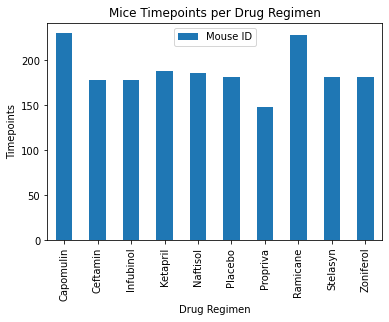

In [18]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas
mouse_dr=new_mouse_df.loc[:,['Mouse ID','Drug Regimen']]
mouse_dr_group=mouse_dr.groupby('Drug Regimen').count()
mouse_dr_group.plot(kind='bar',ylabel='Timepoints',title="Mice Timepoints per Drug Regimen")


<BarContainer object of 10 artists>

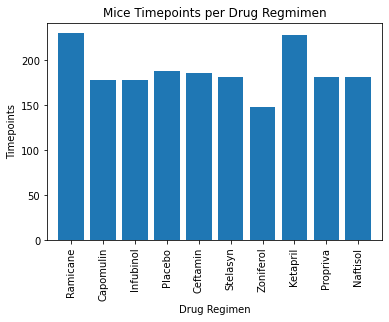

In [19]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
x=mouse_dr['Drug Regimen'].unique()
x_axis=np.arange(len(x))
timepoints=mouse_dr_group.loc[:,"Mouse ID"]
tick_locations=[value for value in x_axis]
plt.xticks(tick_locations,x)
plt.title("Mice Timepoints per Drug Regmimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.xticks(rotation=90)
plt.bar(x_axis,timepoints,alpha=1, align="center")


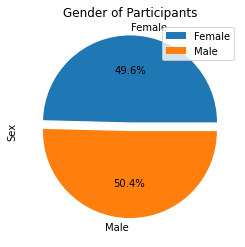

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_df.head()
sex_df=mouse_df.loc[:,["Mouse ID","Sex"]]
sex_df=sex_df.drop_duplicates()
sexes=sex_df.groupby('Sex').count()
explode = (0.1, 0)
labels=sexes.index.tolist()
plot=sexes.plot(kind="pie",y="Mouse ID",ylabel="Sex",labels=labels,explode=explode,autopct="%1.1f%%",title="Gender of Participants")



Text(0, 0.5, 'Sex')

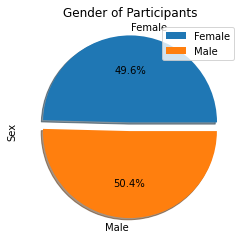

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using Pyplot
 # The values of each section of the pie chart
m_count = sexes.iloc[0:2,0]
# Labels for the sections of our pie chart
labels=sexes.index.tolist()
# Tells matplotlib to seperate the females
explode = (0.1, 0)
plt.title('Gender of Participants')
plt.pie(m_count, explode=explode,labels=labels,autopct="%1.1f%%", shadow=True, startangle=0)
plt.legend()
plt.ylabel('Sex')


In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
all_max_group=new_mouse_df.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_df=pd.merge(all_max_group, new_mouse_df,  how='left', left_on=['Mouse ID','Timepoint'], right_on=['Mouse ID','Timepoint'])
drug_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
    
    
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Locate the rows which contain mice on each drug and get the tumor volumes

for drug in treatment_list:
    tumor_vol=drug_df.loc[drug_df['Drug Regimen'] == drug,'Tumor Volume (mm3)']
    tumor_vol_list.append(tumor_vol)
    

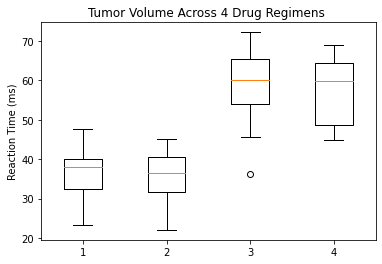

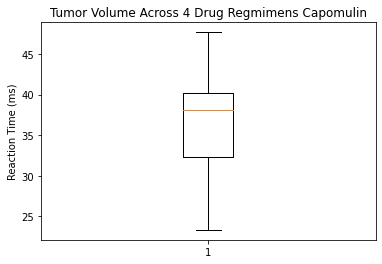

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The median of Capomulin is: 38.1251644
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


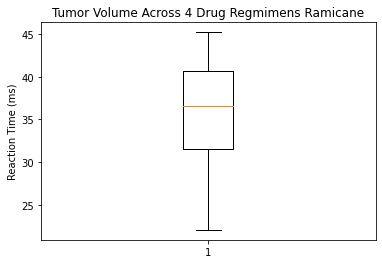

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The median of Ramicane is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


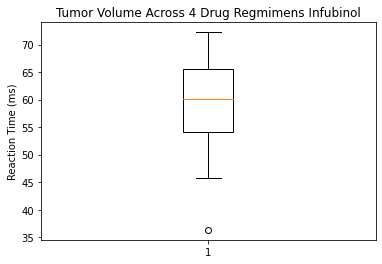

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The median of Infubinol is: 60.16518046
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


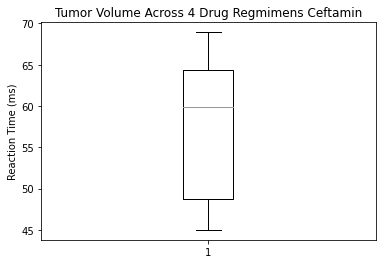

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The median of Ceftamin is: 59.85195552
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [24]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#for drug in treatment_list:
# Example outlier plot of reaction times
#fig1, ax1 = plt.subplots()
fig,ax=plt.subplots()
ax.boxplot(tumor_vol_list)
ax.set_title('Tumor Volume Across 4 Drug Regimens ')
ax.set_ylabel('Reaction Time (ms)')
plt.show()

for x in range(4):
    drugs = (tumor_vol_list[x])
    current_drug=(treatment_list[x])
    fig1, ax1 = plt.subplots()
    ax1.set_title('Tumor Volume Across 4 Drug Regmimens '+ (current_drug))
    ax1.set_ylabel('Reaction Time (ms)')
    ax1.boxplot(drugs)
    plt.show()    
    # Determine outliers using upper and lower bounds
    # Generate a box plot of the final tumor volume of each mouse across four regimens of interest
    quartiles = drugs.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"The lower quartile of {current_drug} is: {lowerq}")
    print(f"The upper quartile of {current_drug} is: {upperq}")
    print(f"The interquartile range of {current_drug} is: {iqr}")
    print(f"The median of {current_drug} is: {quartiles[0.5]}")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    

    
   
    
    

## Line and Scatter Plots

In [26]:
#Filter list of mice by Drug Regimen Capomulin
mouse_capo=new_mouse_df.loc[new_mouse_df['Drug Regimen']== 'Capomulin',:]
#Select the first mouse in filter
mouse=mouse_capo.iloc[0,0]
#Get the first mouse tumor volume numbers over the study
mouse_tum_vol=new_mouse_df.loc[new_mouse_df['Mouse ID']== mouse,'Tumor Volume (mm3)']
#Get the timepoints for the first mouse over the study
mouse_timepoints=new_mouse_df.loc[new_mouse_df['Mouse ID']==mouse,'Timepoint']


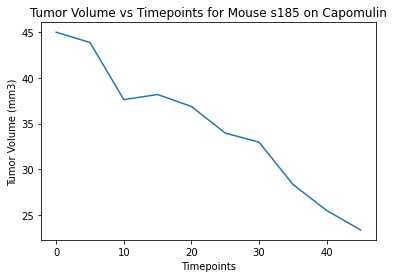

In [27]:
#Generate a line plot of tumor volume vs. time point for a mouse above treated with Capomulin
#single mouse select tim points
fig = plt.figure()
ax = plt.axes()
y=mouse_tum_vol
x=mouse_timepoints
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume vs Timepoints for Mouse "+ (mouse) + " on Capomulin")
ax.plot(x, y);

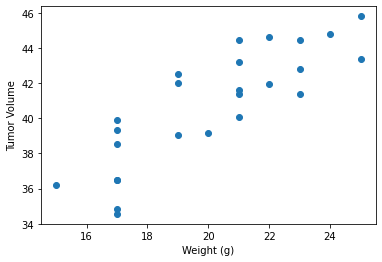

In [28]:
#Create dataframes for scatter plot
mouse_capo_tum_vol=mouse_capo.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
mouse_capo_weight=mouse_capo.groupby(['Mouse ID'])['Weight (g)'].mean()

# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.clf()
plt.scatter(mouse_capo_weight,mouse_capo_tum_vol)

plt.ylabel("Tumor Volume")
plt.xlabel("Weight (g)")
plt.show()

The r-squared is: 0.7088568047708723


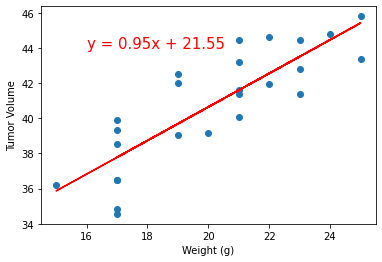

In [29]:
# Add the linear regression equation and line to plot

x_values = mouse_capo_weight
y_values = mouse_capo_tum_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,44),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume')
print(f"The r-squared is: {rvalue**2}")
plt.show()

## Correlation and Regression

In [30]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corr, _ = pearsonr(x_values, y_values)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.842
